In [124]:
import numpy as np 
import random
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import csv
import openpyxl
import pandas as pd
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from itertools import product
from geopy.distance import geodesic
from sklearn.preprocessing import LabelBinarizer

In [125]:
filename='C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022clean.csv'

In [126]:
pdf = pd.read_csv(filename)
pdf.dropna(subset=['Latitude', 'Longitude','Kedalaman', 'Magnitude','Keterangan'])

,Datetime,Latitude,Longitude,Kedalaman,Magnitude,Type,Keterangan,Dirasakan,M,D,MD
1,1/26/2017,-7.9900,111.2000,10,3.2,MLv,Pusat gempa di darat 20 km Tenggara WONOGIRI-J...,TIDAK,M3,D1,M3D1
3,1/28/2017,-9.4400,113.0600,10,4.7,M,Pusat gempa di laut 138 km Tenggara MALANG-JATIM,TIDAK,M4,D1,M4D1
4,1/29/2017,-9.7300,112.8700,10,4.9,MLv,Pusat gempa di laut 166 km tenggara Kab. Malan...,TIDAK,M4,D1,M4D1
5,1/30/2017,-8.3400,108.5400,103,3.5,MLv,"Pusat gempa di laut,74 km Barat Daya Pangandar...",TIDAK,M3,D2,M3D2
7,2/1/2017,-7.4800,109.0000,216,3.3,MLv,Pusat gempa di darat 15 km Barat Laut Banyumas...,TIDAK,M3,D2,M3D2
...,...,...,...,...,...,...,...,...,...,...,...
2153,12/27/2022,-7.8601,110.5298,13,1.3,MLv,Pusat gempa di darat 13 km Tenggara Tegal,TIDAK,M1,D1,M1D1
2154,12/28/2022,-8.8718,112.4565,44,3.2,MLv,Pusat gempa di laut 92 km Tenggara Blitar,TIDAK,M3,D1,M3D1
2155,12/29/2022,-9.0316,112.1481,10,3.2,MLv,Pusat gempa di laut 103 km Selatan Blitar,TIDAK,M3,D1,M3D1
2156,12/30/2022,-10.2996,113.2803,10,3.6,MLv,Pusat gempa di laut 241 km BaratDaya Jember,TIDAK,M3,D1,M3D1


In [127]:
pdf['Datetime'] = pd.to_datetime(pdf['Datetime'], errors='coerce')


In [128]:
pdf_2017 = pdf[pdf['Datetime'].dt.year == 2017]
pdf_2018 = pdf[pdf['Datetime'].dt.year == 2018]
pdf_2019 = pdf[pdf['Datetime'].dt.year == 2019]
pdf_2020 = pdf[pdf['Datetime'].dt.year == 2020]
pdf_2021 = pdf[pdf['Datetime'].dt.year == 2021]
pdf_2022 = pdf[pdf['Datetime'].dt.year == 2022]


In [129]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2158 entries, 0 to 2157
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Datetime    2158 non-null   datetime64[ns]
 1   Latitude    2158 non-null   float64       
 2   Longitude   2158 non-null   float64       
 3   Kedalaman   2158 non-null   int64         
 4   Magnitude   2158 non-null   float64       
 5   Type        1742 non-null   object        
 6   Keterangan  1750 non-null   object        
 7   Dirasakan   1750 non-null   object        
 8   M           1750 non-null   object        
 9   D           1750 non-null   object        
 10  MD          1750 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 185.6+ KB


In [130]:

from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [131]:
llon = 105.0
ulon = 115.0
llat = -9.0
ulat = -5.5

In [132]:

pdf = pdf[(pdf['Longitude'] > llon) & (pdf['Longitude'] < ulon) & (pdf['Latitude'] > llat) &(pdf['Latitude'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

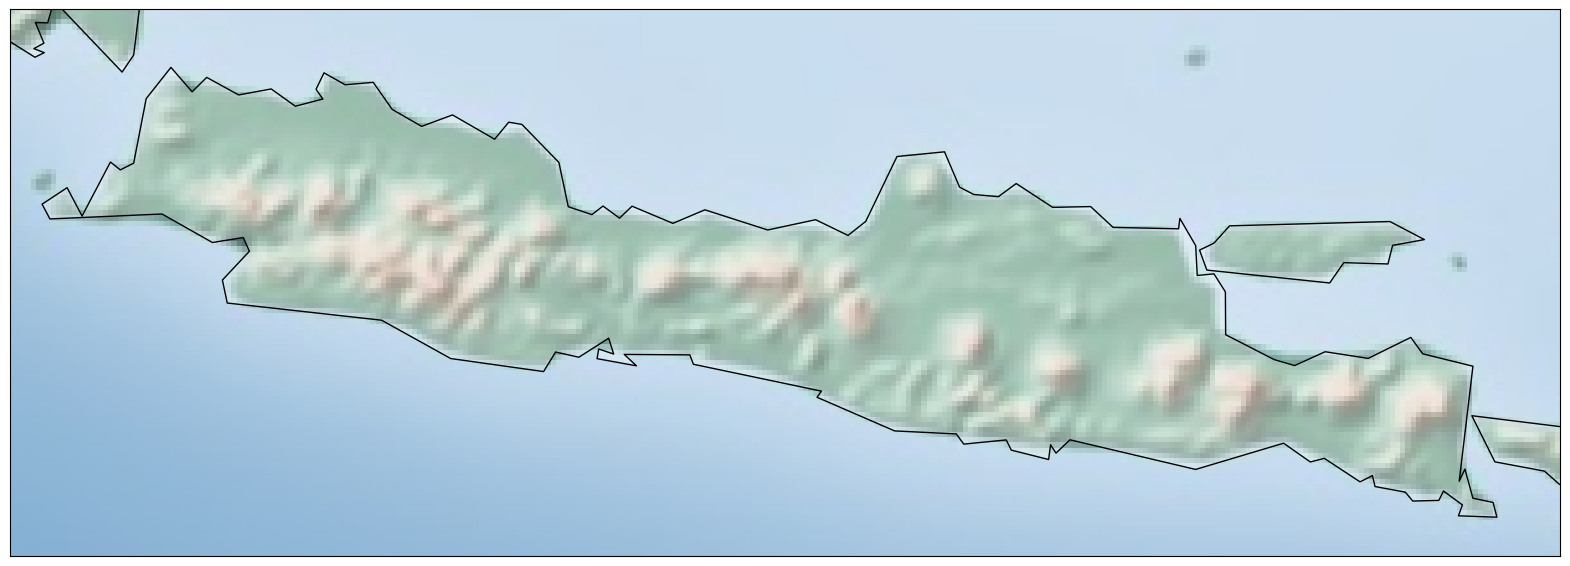

In [133]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

In [134]:
xs,ys = my_map(np.asarray(pdf.Longitude), np.asarray(pdf.Latitude))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

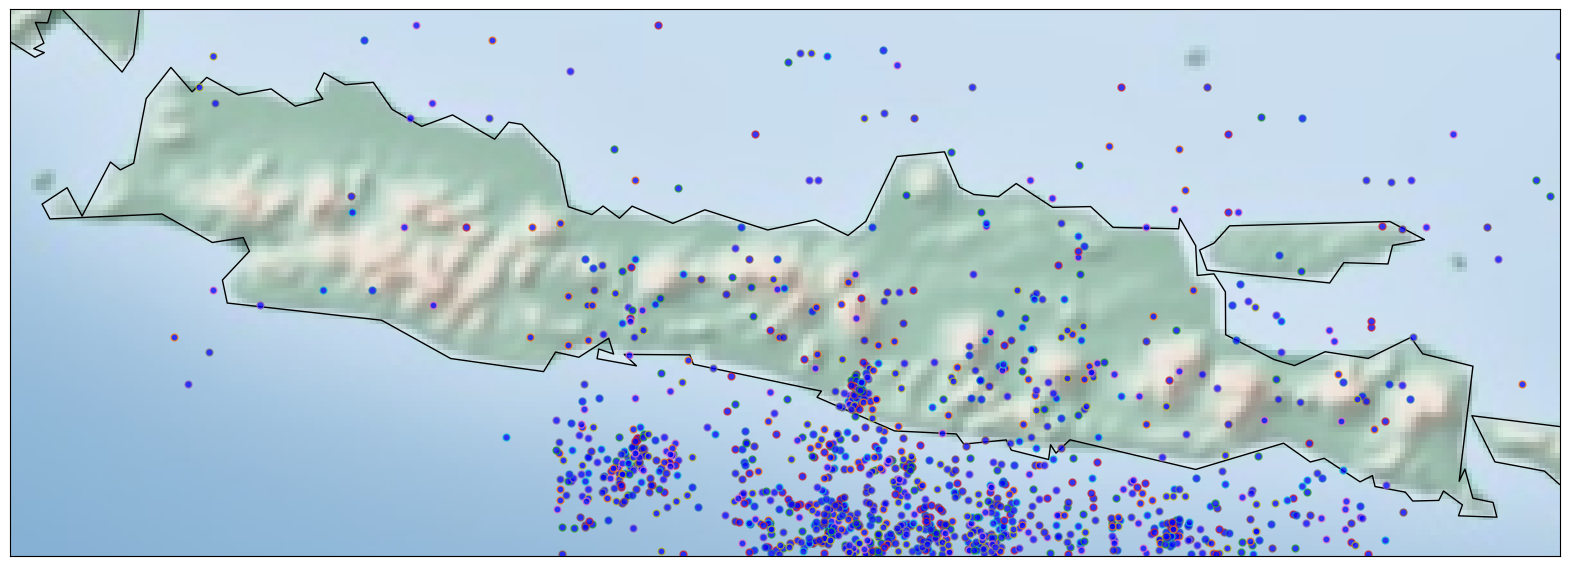

In [135]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
for index, row in pdf.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor ='blue',  marker='o', markersize= 5, alpha = 0.75)
plt.show()

In [136]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

In [137]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm', 'ym', 'Kedalaman']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [138]:
db = DBSCAN(eps=0.15, min_samples=25).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

In [139]:

labels

array([-1, -1, -1, ...,  3,  3, -1], dtype=int64)

In [140]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [141]:
pdf[["Kedalaman", "Clus_Db"]].head(5)

,Kedalaman,Clus_Db
1,10,-1
5,103,-1
6,12,-1
7,216,-1
10,60,-1


In [142]:
set(labels)

{-1, 0, 1, 2, 3}

In [143]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

Cluster 0, Avg Depth: 28.023809523809526
Cluster 1, Avg Depth: 12.827586206896552
Cluster 2, Avg Depth: 13.227272727272727
Cluster 3, Avg Depth: 11.878787878787879


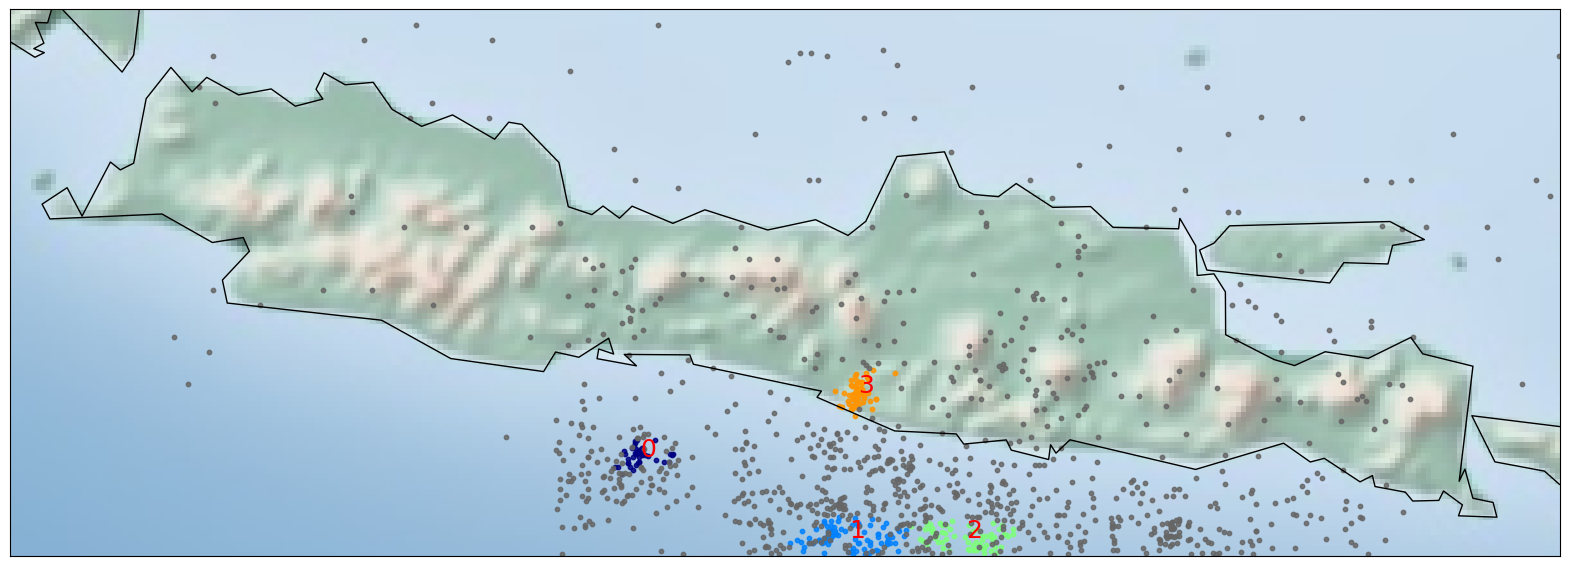

In [144]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Depth: '+ str(np.mean(clust_set.Kedalaman)))

In [145]:
# Menghitung DBI
dbi = davies_bouldin_score(Clus_dataSet, labels)

print("Davies-Bouldin Index:", dbi)

Davies-Bouldin Index: 1.699595733941462


In [146]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(Clus_dataSet, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: -0.2432189423722099


Clustering Tahun 2017

In [147]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime
rcParams['figure.figsize'] = (18, 6)

In [148]:
pdf_2017['Timestamp'] = pdf_2017['Datetime'].apply(lambda x: datetime.timestamp(x))

In [149]:
# Parameter klasterisasi
epsilon = 0.10
min_samples = 20

In [150]:
Clus_dataSet = pdf_2017[['Latitude', 'Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)

pdf_2017['Clus_Db'] = db.labels_

In [151]:
set(db.labels_)

{-1, 0, 1}

In [152]:
labels

array([-1, -1, -1, ...,  3,  3, -1], dtype=int64)

In [153]:
cluster_labels = pdf_2017['Clus_Db'].unique()
cluster_data_by_year = pd.DataFrame(columns=['Cluster', 'Avg Depth'])
for cluster_label in cluster_labels:
    if cluster_label == -1:
        continue
    cluster_data = pdf_2017[pdf_2017['Clus_Db'] == cluster_label]
    avg_depth = cluster_data['Datetime'].mean()
    row = pd.DataFrame({'Cluster': [cluster_label], 'Avg Depth': [avg_depth]})
    cluster_data_by_year = pd.concat([cluster_data_by_year, row], ignore_index=True)
print(cluster_data_by_year)

  Cluster                     Avg Depth
0       1 2017-08-06 10:58:17.142857216
1       0 2017-07-02 16:48:00.000000000


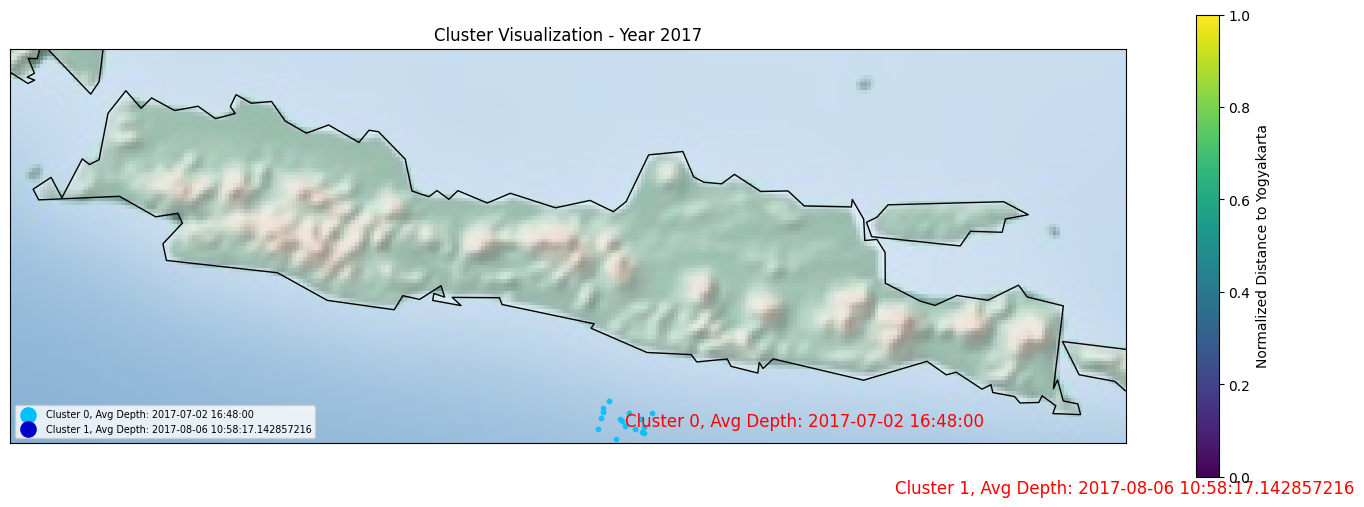

In [154]:
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

# Draw map elements
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

# Yogyakarta coordinates
yogyakarta_coords = (-7.7956, 110.3695)

# Calculate distances from each point to Yogyakarta
pdf_2017['Distance_to_Yogyakarta'] = pdf_2017.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), yogyakarta_coords).kilometers, axis=1)

# Normalize the distances to the range [0, 1]
max_distance = pdf_2017['Distance_to_Yogyakarta'].max()
min_distance = pdf_2017['Distance_to_Yogyakarta'].min()
pdf_2017['Normalized_Distance'] = (pdf_2017['Distance_to_Yogyakarta'] - min_distance) / (max_distance - min_distance)

# Create a colormap from blue to red based on the normalized distances
colors = plt.get_cmap('jet')(pdf_2017['Normalized_Distance'])

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
legend_handles = []  # List to store legend handles
legend_labels = []  # List to store legend labels

for clust_number, color in zip(set(labels), colors):
    if clust_number == -1:
        continue
    clust_set = pdf_2017[pdf_2017['Clus_Db'] == clust_number]
    if len(clust_set) > 0:  # Check if the cluster is not empty
        xm, ym = my_map(np.asarray(clust_set['Longitude']), np.asarray(clust_set['Latitude']))
        my_map.scatter(xm, ym, color=color, marker='o', s=10, alpha=0.85)
        avg_depth = clust_set['Datetime'].mean()
        if pd.notna(avg_depth):  # Check if the average depth is valid (not NaN)
            cenx = np.mean(xm)
            ceny = np.mean(ym)
            plt.text(cenx, ceny, f"Cluster {clust_number}, Avg Depth: {avg_depth}", fontsize=12, color='red')
            legend_handles.append(plt.scatter([], [], color=color, marker='o', s=30))
            legend_labels.append(f'Cluster {clust_number}, Avg Depth: {avg_depth}')

# Add a legend to the map
plt.legend(legend_handles, legend_labels, loc='lower left', fontsize='x-small', markerscale=2)

# Add a colorbar legend
cbar = plt.colorbar(label='Normalized Distance to Yogyakarta')

# Create a dummy image for the colorbar
dummy_img = plt.imshow([pdf_2017['Normalized_Distance']], cmap='jet')
dummy_img.set_visible(False)

# Show the map with the legend
plt.title('Cluster Visualization - Year 2017')
plt.show()

In [155]:
cluster_0 = pdf_2017.where(pdf_2017['Clus_Db'] == 0).dropna()
print(cluster_0)


      Datetime  Latitude  Longitude  Kedalaman  Magnitude Type  \
18  2017-02-12     -8.92     110.68       10.0        3.6  MLv   
21  2017-02-15     -8.85     110.51       10.0        2.8  MLv   
39  2017-03-05     -9.02     110.55        7.0        3.2  MLv   
41  2017-03-07     -8.73     110.31       10.0        2.6  MLv   
64  2017-03-30     -8.63     110.37       29.0        2.8  MLv   
96  2017-05-01     -9.06     110.51       10.0        3.6  MLv   
99  2017-05-04     -8.79     110.65       15.0        2.8  MLv   
120 2017-05-25     -8.88     110.27       10.0        3.3  MLv   
138 2017-06-12     -8.81     110.48       26.0        2.8  MLv   
168 2017-07-14     -8.74     110.55       30.0        4.2  MLv   
174 2017-07-20     -9.04     110.47       10.0        5.3  MLv   
181 2017-07-27     -8.88     110.60       10.0        3.7  MLv   
197 2017-08-13     -8.86     110.68       10.0        3.9  MLv   
198 2017-08-14     -8.79     110.47       20.0        3.2  MLv   
205 2017-0

In [156]:
# Menghilangkan data yang tidak termasuk dalam klaster utama (-1)
clustered_data = pdf_2017[pdf_2017['Clus_Db'] != -1]

# Mengambil atribut yang digunakan untuk klastering
X = clustered_data[['Latitude', 'Longitude']]

# Mengambil label klaster
labels = clustered_data['Clus_Db']

# Menghitung Davies-Bouldin Index
dbi_2017 = davies_bouldin_score(X, labels)

print("Davies-Bouldin Index:", dbi_2017)


Davies-Bouldin Index: 0.16369220399911272


In [157]:
# Calculate the silhouette score
silhouette_avg_2017 = silhouette_score(X, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg_2017)

The average silhouette score is: 0.8814907931812568


Clustering Tahun 2018

In [158]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime
rcParams['figure.figsize'] = (18, 6)

In [159]:
pdf_2018['Timestamp'] = pdf_2018['Datetime'].apply(lambda x: datetime.timestamp(x))

In [160]:
# Parameter klasterisasi
epsilon = 0.10
min_samples = 25

In [161]:
Clus_dataSet = pdf_2018[['Latitude', 'Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)

pdf_2018['Clus_Db'] = db.labels_

In [162]:
cluster_labels = pdf_2018['Clus_Db'].unique()
cluster_data_by_year = pd.DataFrame(columns=['Cluster', 'Avg Depth'])
for cluster_label in cluster_labels:
    if cluster_label == -1:
        continue
    cluster_data = pdf_2018[pdf_2018['Clus_Db'] == cluster_label]
    avg_depth = cluster_data['Datetime'].mean()
    row = pd.DataFrame({'Cluster': [cluster_label], 'Avg Depth': [avg_depth]})
    cluster_data_by_year = pd.concat([cluster_data_by_year, row], ignore_index=True)
print(cluster_data_by_year)

  Cluster                     Avg Depth
0       1 2018-06-11 01:42:51.428571392
1       2 2018-06-30 22:13:20.000000000
2       0 2018-07-15 09:00:00.000000000


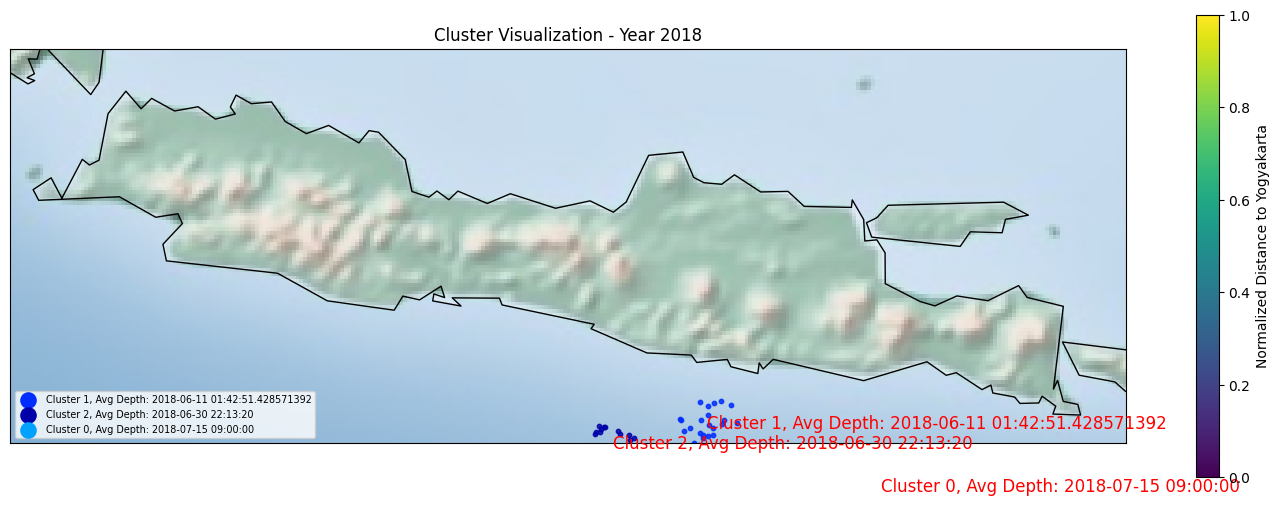

In [163]:
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

yogyakarta_coords = (-7.797068, 110.370529)  # Yogyakarta coordinates (latitude, longitude)
distances_to_yogyakarta = np.sqrt((pdf_2018['Latitude'] - yogyakarta_coords[0]) ** 2 +
                                  (pdf_2018['Longitude'] - yogyakarta_coords[1]) ** 2)

# Normalize distances to range [0, 1]
normalized_distances = (distances_to_yogyakarta - distances_to_yogyakarta.min()) / (distances_to_yogyakarta.max() - distances_to_yogyakarta.min())

# Define a colormap that goes from blue to red based on the normalized distances
colors = plt.get_cmap('jet')(normalized_distances)

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
legend_handles = []  # List to store legend handles
legend_labels = []  # List to store legend labels

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
for clust_number, color in zip(cluster_labels, colors):
    if clust_number == -1:
        continue
    clust_set = pdf_2018[pdf_2018.Clus_Db == clust_number]
    xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
    my_map.scatter(xm, ym, color=color, marker='o', s=10, alpha=0.85)
    avg_depth = clust_set['Datetime'].mean()
    if pd.notna(avg_depth):  # Check if the average depth is valid (not NaN)
        cenx = np.mean(xm)
        ceny = np.mean(ym)
        plt.text(cenx, ceny, f"Cluster {clust_number}, Avg Depth: {avg_depth}", fontsize=12, color='red')
        legend_handles.append(plt.scatter([], [], color=color, marker='o', s=30))
        legend_labels.append(f'Cluster {clust_number}, Avg Depth: {avg_depth}')

# Add a legend to the map
plt.legend(legend_handles, legend_labels, loc='lower left', fontsize='x-small', markerscale=2)

# Add a colorbar legend
cbar = plt.colorbar(label='Normalized Distance to Yogyakarta')

plt.title(f"Cluster Visualization - Year 2018")
plt.show()

In [164]:
cluster_0 = pdf_2018.where(pdf_2018['Clus_Db'] == 0).dropna()
print(cluster_0)

      Datetime  Latitude  Longitude  Kedalaman  Magnitude Type  \
369 2018-02-03     -9.37     112.87       30.0        3.5  MLv   
370 2018-02-04     -9.31     112.58       14.0        3.3  MLv   
379 2018-02-13     -9.26     112.83       10.0        3.5  MLv   
382 2018-02-16     -9.64     112.90       10.0        3.4  MLv   
396 2018-03-02     -9.33     112.64       10.0        3.4  MLv   
403 2018-03-09     -9.46     112.87       10.0        4.2  MLv   
407 2018-03-13     -9.48     112.50       10.0        3.1  MLv   
409 2018-03-15     -9.44     112.75       10.0        3.3  MLv   
451 2018-04-26     -9.44     112.54       10.0        4.8  MLv   
467 2018-05-12     -9.46     112.80        9.0        3.8  MLv   
481 2018-05-26     -9.22     112.88       10.0        3.4  MLv   
486 2018-06-01     -9.40     112.74       10.0        3.2  MLv   
522 2018-07-06     -9.27     112.72       10.0        3.2  MLv   
528 2018-07-12     -9.27     112.85        8.0        3.5  MLv   
536 2018-0

In [165]:
# Menghilangkan data yang tidak termasuk dalam klaster utama (-1)
clustered_data = pdf_2018[pdf_2018['Clus_Db'] != -1]

# Mengambil atribut yang digunakan untuk klastering
X = clustered_data[['Latitude', 'Longitude']]

# Mengambil label klaster
labels = clustered_data['Clus_Db']

# Menghitung Davies-Bouldin Index
dbi_2018 = davies_bouldin_score(X, labels)

print("Davies-Bouldin Index:", dbi_2018)

Davies-Bouldin Index: 0.35468483320373867


In [166]:
# Calculate the silhouette score
silhouette_avg_2018 = silhouette_score(X, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg_2018)

The average silhouette score is: 0.7619106867185346


Clustering Tahun 2019

In [167]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime
rcParams['figure.figsize'] = (18, 6)

In [168]:
pdf_2019['Timestamp'] = pdf_2019['Datetime'].apply(lambda x: datetime.timestamp(x))

In [169]:
# Parameter klasterisasi
epsilon = 0.15
min_samples = 25

In [170]:
Clus_dataSet = pdf_2019[['Latitude', 'Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)

pdf_2019['Clus_Db'] = db.labels_

In [171]:
cluster_labels = pdf_2019['Clus_Db'].unique()
cluster_data_by_year = pd.DataFrame(columns=['Cluster', 'Avg Depth'])
for cluster_label in cluster_labels:
    if cluster_label == -1:
        continue
    cluster_data = pdf_2019[pdf_2019['Clus_Db'] == cluster_label]
    avg_depth = cluster_data['Datetime'].mean()
    row = pd.DataFrame({'Cluster': [cluster_label], 'Avg Depth': [avg_depth]})
    cluster_data_by_year = pd.concat([cluster_data_by_year, row], ignore_index=True)
print(cluster_data_by_year)

  Cluster                     Avg Depth
0       0 2019-05-20 17:39:37.358490624
1       1 2019-08-09 07:32:34.285714176


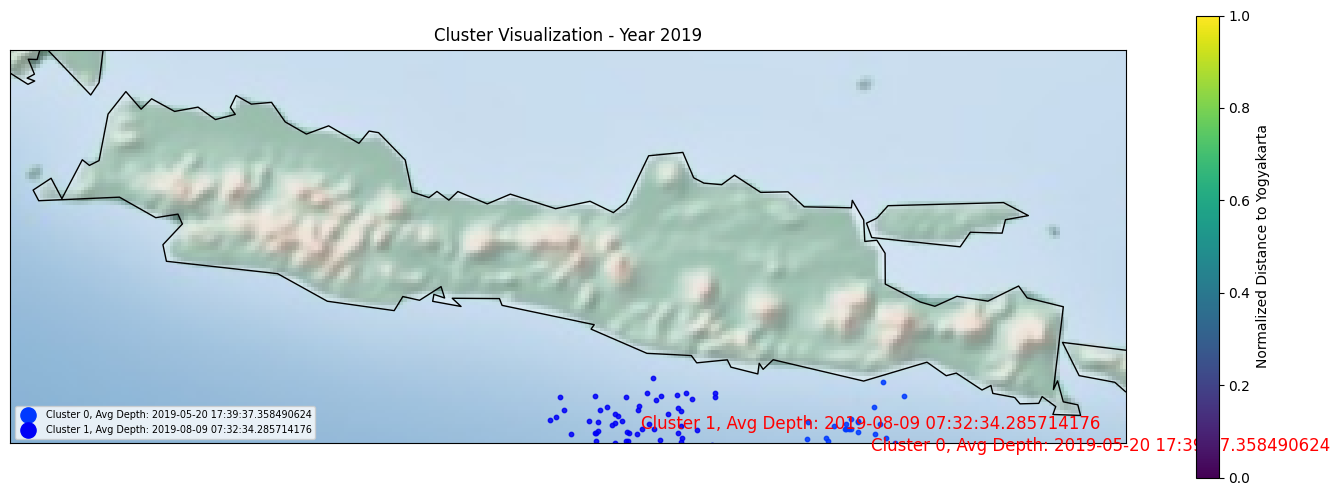

In [172]:
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

yogyakarta_coords = (-7.797068, 110.370529)  # Yogyakarta coordinates (latitude, longitude)
distances_to_yogyakarta = np.sqrt((pdf_2019['Latitude'] - yogyakarta_coords[0]) ** 2 +
                                  (pdf_2019['Longitude'] - yogyakarta_coords[1]) ** 2)

# Normalize distances to range [0, 1]
normalized_distances = (distances_to_yogyakarta - distances_to_yogyakarta.min()) / (distances_to_yogyakarta.max() - distances_to_yogyakarta.min())

# Define a colormap that goes from blue to red based on the normalized distances
colors = plt.get_cmap('jet')(normalized_distances)

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
legend_handles = []  # List to store legend handles
legend_labels = []  # List to store legend labels

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
for clust_number, color in zip(cluster_labels, colors):
    if clust_number == -1:
        continue
    clust_set = pdf_2019[pdf_2019.Clus_Db == clust_number]
    xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
    my_map.scatter(xm, ym, color=color, marker='o', s=10, alpha=0.85)
    avg_depth = clust_set['Datetime'].mean()
    if pd.notna(avg_depth):  # Check if the average depth is valid (not NaN)
        cenx = np.mean(xm)
        ceny = np.mean(ym)
        plt.text(cenx, ceny, f"Cluster {clust_number}, Avg Depth: {avg_depth}", fontsize=12, color='red')
        legend_handles.append(plt.scatter([], [], color=color, marker='o', s=30))
        legend_labels.append(f'Cluster {clust_number}, Avg Depth: {avg_depth}')

# Add a legend to the map
plt.legend(legend_handles, legend_labels, loc='lower left', fontsize='x-small', markerscale=2)

# Add a colorbar legend
cbar = plt.colorbar(label='Normalized Distance to Yogyakarta')

plt.title(f"Cluster Visualization - Year 2019")
plt.show()

In [173]:
cluster_0 = pdf_2019.where(pdf_2019['Clus_Db'] == 0).dropna()
print(cluster_0)

       Datetime  Latitude  Longitude  Kedalaman  Magnitude Type  \
701  2019-01-02     -8.85     112.38       89.0        3.4  MLv   
710  2019-01-11     -9.26     112.98       10.0        3.2  MLv   
717  2019-01-18     -9.06     112.35       30.0        2.8  MLv   
718  2019-01-19     -9.08     112.73       10.0        2.6  MLv   
722  2019-01-23     -9.42     112.89        8.0        3.0  MLv   
723  2019-01-24     -9.00     112.93       87.0        3.8  MLv   
724  2019-01-25     -8.92     112.75       11.0        3.4  MLv   
726  2019-01-27     -9.11     113.00       10.0        2.9  MLv   
731  2019-02-01     -9.10     112.44       10.0        3.6  MLv   
733  2019-02-03     -9.16     113.36       10.0        2.8  MLv   
737  2019-02-07     -8.58     113.01       99.0        3.2  MLv   
743  2019-02-13     -9.15     112.58       15.0        4.8  MLv   
744  2019-02-14     -9.03     112.74       10.0        4.0  MLv   
747  2019-02-17     -8.87     112.54       20.0        3.1  ML

In [174]:
# Menghilangkan data yang tidak termasuk dalam klaster utama (-1)
clustered_data = pdf_2019[pdf_2019['Clus_Db'] != -1]

# Mengambil atribut yang digunakan untuk klastering
X = clustered_data[['Latitude', 'Longitude']]

# Mengambil label klaster
labels = clustered_data['Clus_Db']

# Menghitung Davies-Bouldin Index
dbi_2019 = davies_bouldin_score(X, labels)

print("Davies-Bouldin Index:", dbi_2019)


Davies-Bouldin Index: 0.36286688742858775


In [175]:
# Calculate the silhouette score
silhouette_avg_2019 = silhouette_score(X, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg_2019)

The average silhouette score is: 0.7339168330933936


Clustering Tahun 2020

In [176]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime
rcParams['figure.figsize'] = (18, 6)

In [177]:
pdf_2020['Timestamp'] = pdf_2020['Datetime'].apply(lambda x: datetime.timestamp(x))

In [178]:
# Parameter klasterisasi
epsilon = 0.15
min_samples = 25

In [179]:
Clus_dataSet = pdf_2020[['Latitude', 'Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)

pdf_2020['Clus_Db'] = db.labels_

In [180]:
cluster_labels = pdf_2020['Clus_Db'].unique()
cluster_data_by_year = pd.DataFrame(columns=['Cluster', 'Avg Depth'])
for cluster_label in cluster_labels:
    if cluster_label == -1:
        continue
    cluster_data = pdf_2020[pdf_2020['Clus_Db'] == cluster_label]
    avg_depth = cluster_data['Datetime'].mean()
    row = pd.DataFrame({'Cluster': [cluster_label], 'Avg Depth': [avg_depth]})
    cluster_data_by_year = pd.concat([cluster_data_by_year, row], ignore_index=True)
print(cluster_data_by_year)

  Cluster                     Avg Depth
0       0 2020-07-03 16:32:16.134453760
1       1 2020-06-24 21:07:12.000000000


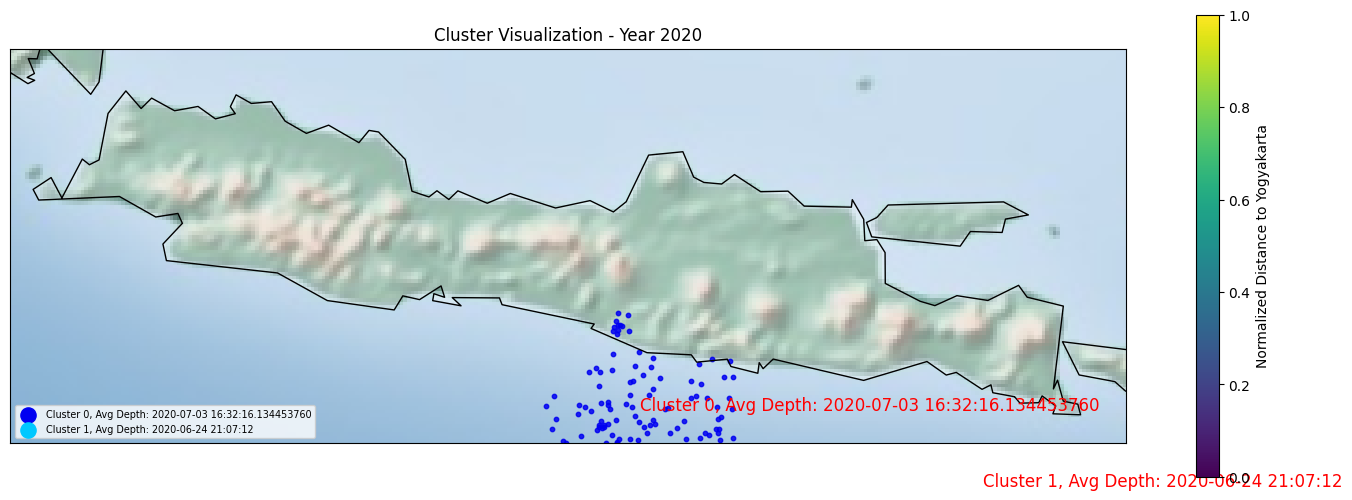

In [181]:
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

yogyakarta_coords = (-7.797068, 110.370529)  # Yogyakarta coordinates (latitude, longitude)
distances_to_yogyakarta = np.sqrt((pdf_2020['Latitude'] - yogyakarta_coords[0]) ** 2 +
                                  (pdf_2020['Longitude'] - yogyakarta_coords[1]) ** 2)

# Normalize distances to range [0, 1]
normalized_distances = (distances_to_yogyakarta - distances_to_yogyakarta.min()) / (distances_to_yogyakarta.max() - distances_to_yogyakarta.min())

# Define a colormap that goes from blue to red based on the normalized distances
colors = plt.get_cmap('jet')(normalized_distances)

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
legend_handles = []  # List to store legend handles
legend_labels = []  # List to store legend labels

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
for clust_number, color in zip(cluster_labels, colors):
    if clust_number == -1:
        continue
    clust_set = pdf_2020[pdf_2020.Clus_Db == clust_number]
    xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
    my_map.scatter(xm, ym, color=color, marker='o', s=10, alpha=0.85)
    avg_depth = clust_set['Datetime'].mean()
    if pd.notna(avg_depth):  # Check if the average depth is valid (not NaN)
        cenx = np.mean(xm)
        ceny = np.mean(ym)
        plt.text(cenx, ceny, f"Cluster {clust_number}, Avg Depth: {avg_depth}", fontsize=12, color='red')
        legend_handles.append(plt.scatter([], [], color=color, marker='o', s=30))
        legend_labels.append(f'Cluster {clust_number}, Avg Depth: {avg_depth}')

# Add a legend to the map
plt.legend(legend_handles, legend_labels, loc='lower left', fontsize='x-small', markerscale=2)

# Add a colorbar legend
cbar = plt.colorbar(label='Normalized Distance to Yogyakarta')

plt.title(f"Cluster Visualization - Year 2020")
plt.show()

In [182]:
cluster_0 = pdf_2020.where(pdf_2020['Clus_Db'] == 0).dropna()
print(cluster_0)

       Datetime  Latitude  Longitude  Kedalaman  Magnitude Type  \
1064 2020-01-01    -9.060  110.51000       10.0        3.9    M   
1067 2020-01-04    -8.200  110.64000       79.0        3.0  MLv   
1069 2020-01-06    -8.930  110.39000       51.0        3.3  MLv   
1071 2020-01-08    -9.100  110.78000        4.0        3.3  MLv   
1072 2020-01-09    -9.100  110.63000       10.0        3.4    M   
...         ...       ...        ...        ...        ...  ...   
1421 2020-12-23    -9.330  110.64000       20.0        3.5  MLv   
1422 2020-12-24    -8.940  110.12000       10.0        3.1  MLv   
1423 2020-12-25    -8.990  110.44000       10.0        2.9  MLv   
1427 2020-12-29    -8.831  110.35994       25.0        3.2  MLv   
1428 2020-12-30    -8.575  110.72773       18.0        3.2  MLv   

                                             Keterangan Dirasakan   M   D  \
1064  Pusat gempa di laut, 118 km BaratDaya GUNUNGKI...     TIDAK  M3  D1   
1067  \n\tPusat gempa di laut 23 km Tengg

In [183]:
# Menghilangkan data yang tidak termasuk dalam klaster utama (-1)
clustered_data = pdf_2020[pdf_2020['Clus_Db'] != -1]

# Mengambil atribut yang digunakan untuk klastering
X = clustered_data[['Latitude', 'Longitude']]

# Mengambil label klaster
labels = clustered_data['Clus_Db']

# Menghitung Davies-Bouldin Index
dbi_2020 = davies_bouldin_score(X, labels)

print("Davies-Bouldin Index:", dbi_2020)


Davies-Bouldin Index: 0.24491930685428598


In [184]:
# Calculate the silhouette score
silhouette_avg_2020 = silhouette_score(X, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg_2020)

The average silhouette score is: 0.7888138646907575


Clustering Tahun 2021

In [185]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime
rcParams['figure.figsize'] = (18, 6)

In [186]:
pdf_2021['Timestamp'] = pdf_2021['Datetime'].apply(lambda x: datetime.timestamp(x))

In [187]:
# Parameter klasterisasi
epsilon = 0.15
min_samples = 10

In [188]:
Clus_dataSet = pdf_2021[['Latitude', 'Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)

pdf_2021['Clus_Db'] = db.labels_

In [189]:
cluster_labels = pdf_2021['Clus_Db'].unique()
cluster_data_by_year = pd.DataFrame(columns=['Cluster', 'Avg Depth'])
for cluster_label in cluster_labels:
    if cluster_label == -1:
        continue
    cluster_data = pdf_2021[pdf_2021['Clus_Db'] == cluster_label]
    avg_depth = cluster_data['Datetime'].mean()
    row = pd.DataFrame({'Cluster': [cluster_label], 'Avg Depth': [avg_depth]})
    cluster_data_by_year = pd.concat([cluster_data_by_year, row], ignore_index=True)
print(cluster_data_by_year)

  Cluster                     Avg Depth
0       0 2021-05-18 18:17:08.571428608
1       1 2021-07-11 00:08:53.333333248
2       2 2021-06-14 00:00:00.000000000


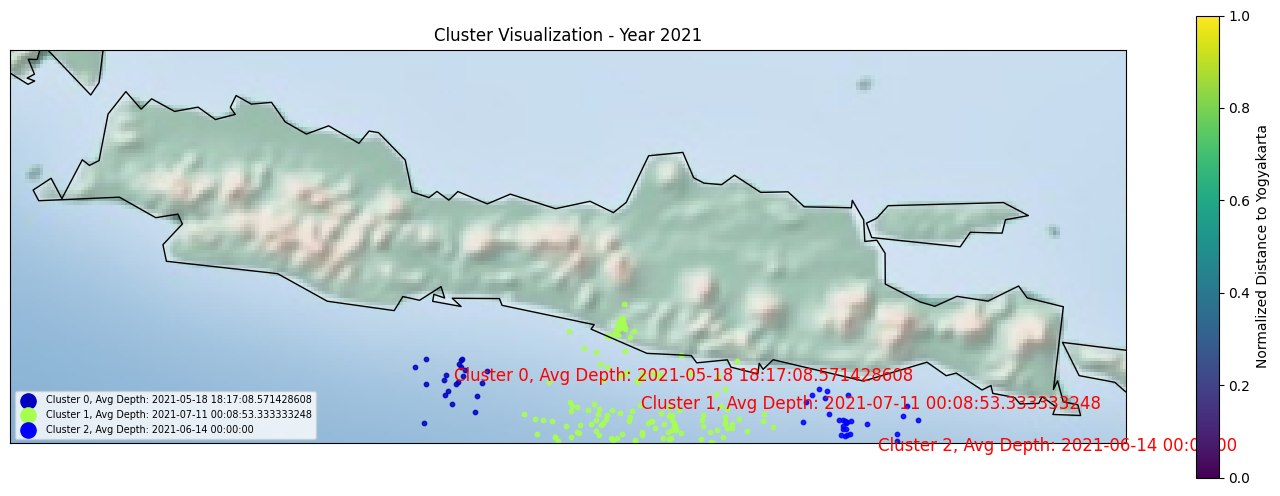

In [190]:
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

yogyakarta_coords = (-7.797068, 110.370529)  # Yogyakarta coordinates (latitude, longitude)
distances_to_yogyakarta = np.sqrt((pdf_2021['Latitude'] - yogyakarta_coords[0]) ** 2 +
                                  (pdf_2021['Longitude'] - yogyakarta_coords[1]) ** 2)

# Normalize distances to range [0, 1]
normalized_distances = (distances_to_yogyakarta - distances_to_yogyakarta.min()) / (distances_to_yogyakarta.max() - distances_to_yogyakarta.min())

# Define a colormap that goes from blue to red based on the normalized distances
colors = plt.get_cmap('jet')(normalized_distances)

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
legend_handles = []  # List to store legend handles
legend_labels = []  # List to store legend labels

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
for clust_number, color in zip(cluster_labels, colors):
    if clust_number == -1:
        continue
    clust_set = pdf_2021[pdf_2021.Clus_Db == clust_number]
    xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
    my_map.scatter(xm, ym, color=color, marker='o', s=10, alpha=0.85)
    avg_depth = clust_set['Datetime'].mean()
    if pd.notna(avg_depth):  # Check if the average depth is valid (not NaN)
        cenx = np.mean(xm)
        ceny = np.mean(ym)
        plt.text(cenx, ceny, f"Cluster {clust_number}, Avg Depth: {avg_depth}", fontsize=12, color='red')
        legend_handles.append(plt.scatter([], [], color=color, marker='o', s=30))
        legend_labels.append(f'Cluster {clust_number}, Avg Depth: {avg_depth}')

# Add a legend to the map
plt.legend(legend_handles, legend_labels, loc='lower left', fontsize='x-small', markerscale=2)

# Add a colorbar legend
cbar = plt.colorbar(label='Normalized Distance to Yogyakarta')

plt.title(f"Cluster Visualization - Year 2021")
plt.show()

In [191]:
cluster_0 = pdf_2021.where(pdf_2021['Clus_Db'] == 0).dropna()
print(cluster_0)

       Datetime  Latitude  Longitude  Kedalaman  Magnitude Type  \
1433 2021-01-04  -8.45300  109.01801       18.0        3.5  MLv   
1437 2021-01-08  -8.53600  108.92644       26.0        2.8  MLv   
1443 2021-01-14  -8.47000  108.73000       44.0        4.2  MLv   
1461 2021-02-01  -8.39400  108.91101       78.0        4.2  MLv   
1469 2021-02-09  -8.35900  109.27050       39.0        3.6  MLv   
1477 2021-02-17  -8.25000  109.04606       14.0        3.0  MLv   
1481 2021-02-21  -8.65000  108.96396       10.0        3.2  MLv   
1486 2021-02-26  -8.32300  108.62820       15.0        3.2  MLv   
1514 2021-03-26  -8.81700  108.70883       10.0        3.0  MLv   
1531 2021-04-13  -8.26200  109.04355       35.0        3.0  MLv   
1533 2021-04-15  -8.29700  109.02326       28.0        2.9  MLv   
1550 2021-05-02  -8.46900  109.23077       10.0        3.2  MLv   
1595 2021-06-16  -8.34900  109.07825       21.0        3.5    M   
1606 2021-06-27  -8.57600  109.18737       10.0        3.6  ML

In [192]:
# Menghilangkan data yang tidak termasuk dalam klaster utama (-1)
clustered_data = pdf_2021[pdf_2021['Clus_Db'] != -1]

# Mengambil atribut yang digunakan untuk klastering
X = clustered_data[['Latitude', 'Longitude']]

# Mengambil label klaster
labels = clustered_data['Clus_Db']

# Menghitung Davies-Bouldin Index
dbi_2021 = davies_bouldin_score(X, labels)

print("Davies-Bouldin Index:", dbi_2021)


Davies-Bouldin Index: 0.47234859128221923


In [193]:
# Calculate the silhouette score
silhouette_avg_2021 = silhouette_score(X, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg_2021)

The average silhouette score is: 0.547454816567376


Clustering Tahun 2022

In [194]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from datetime import datetime
rcParams['figure.figsize'] = (18, 6)

In [195]:
pdf_2022['Timestamp'] = pdf_2022['Datetime'].apply(lambda x: datetime.timestamp(x))

In [196]:
# Parameter klasterisasi
epsilon = 0.15
min_samples = 25

In [197]:
Clus_dataSet = pdf_2022[['Latitude', 'Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(Clus_dataSet)

pdf_2022['Clus_Db'] = db.labels_

In [198]:
cluster_labels = pdf_2022['Clus_Db'].unique()
cluster_data_by_year = pd.DataFrame(columns=['Cluster', 'Avg Depth'])
for cluster_label in cluster_labels:
    if cluster_label == -1:
        continue
    cluster_data = pdf_2022[pdf_2022['Clus_Db'] == cluster_label]
    avg_depth = cluster_data['Datetime'].mean()
    row = pd.DataFrame({'Cluster': [cluster_label], 'Avg Depth': [avg_depth]})
    cluster_data_by_year = pd.concat([cluster_data_by_year, row], ignore_index=True)
print(cluster_data_by_year)

  Cluster                     Avg Depth
0       2 2022-06-26 00:00:00.000000000
1       0 2022-06-14 20:54:11.612903168
2       1 2022-07-05 05:45:36.000000000


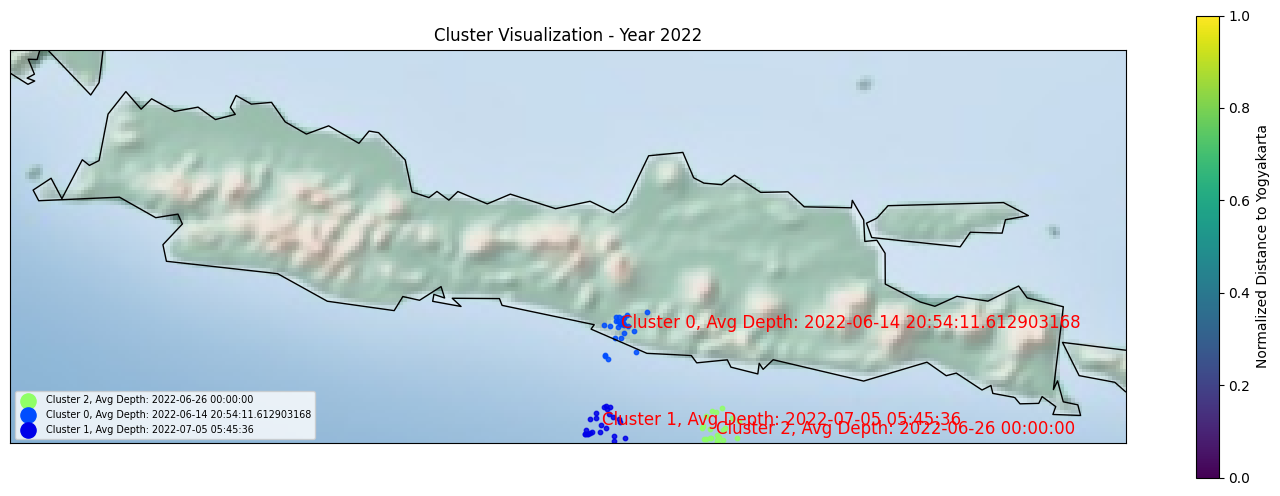

In [199]:
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

yogyakarta_coords = (-7.797068, 110.370529)  # Yogyakarta coordinates (latitude, longitude)
distances_to_yogyakarta = np.sqrt((pdf_2022['Latitude'] - yogyakarta_coords[0]) ** 2 +
                                  (pdf_2022['Longitude'] - yogyakarta_coords[1]) ** 2)

# Normalize distances to range [0, 1]
normalized_distances = (distances_to_yogyakarta - distances_to_yogyakarta.min()) / (distances_to_yogyakarta.max() - distances_to_yogyakarta.min())

# Define a colormap that goes from blue to red based on the normalized distances
colors = plt.get_cmap('jet')(normalized_distances)

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
legend_handles = []  # List to store legend handles
legend_labels = []  # List to store legend labels

# Plot the data points with different colors based on their clusters and distance to Yogyakarta
for clust_number, color in zip(cluster_labels, colors):
    if clust_number == -1:
        continue
    clust_set = pdf_2022[pdf_2022.Clus_Db == clust_number]
    xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
    my_map.scatter(xm, ym, color=color, marker='o', s=10, alpha=0.85)
    avg_depth = clust_set['Datetime'].mean()
    if pd.notna(avg_depth):  # Check if the average depth is valid (not NaN)
        cenx = np.mean(xm)
        ceny = np.mean(ym)
        plt.text(cenx, ceny, f"Cluster {clust_number}, Avg Depth: {avg_depth}", fontsize=12, color='red')
        legend_handles.append(plt.scatter([], [], color=color, marker='o', s=30))
        legend_labels.append(f'Cluster {clust_number}, Avg Depth: {avg_depth}')

# Add a legend to the map
plt.legend(legend_handles, legend_labels, loc='lower left', fontsize='x-small', markerscale=2)

# Add a colorbar legend
cbar = plt.colorbar(label='Normalized Distance to Yogyakarta')

plt.title(f"Cluster Visualization - Year 2022")
plt.show()

In [200]:
cluster_0 = pdf_2022.where(pdf_2022['Clus_Db'] == 0).dropna()
print(cluster_0)

       Datetime  Latitude  Longitude  Kedalaman  Magnitude Type  \
1803 2022-01-10 -7.935760  110.48217       15.0        1.8  MLv   
1804 2022-01-11 -7.943710  110.49518       13.0        2.0  MLv   
1811 2022-01-18 -8.061650  110.47755      122.0        1.7  MLv   
1813 2022-01-20 -7.960000  110.38000       12.0        1.3  MLv   
1814 2022-01-21 -7.925250  110.48450       11.0        2.3  MLv   
1822 2022-01-29 -7.935710  110.48481       17.0        1.4  MLv   
1845 2022-02-21 -7.935420  110.49056       21.0        1.3    M   
1852 2022-02-28 -7.878810  110.42851       16.0        1.8  MLv   
1879 2022-03-27 -7.944442  110.46919       11.0        1.2    M   
1880 2022-03-28 -8.256270  110.35714      106.0        2.7  MLv   
1883 2022-03-31 -7.971170  110.44587       18.0        2.3    M   
1888 2022-04-05 -8.192330  110.60707      136.0        4.8    M   
1898 2022-04-15 -7.940490  110.47060       11.0        1.3  MLv   
1900 2022-04-17 -8.062700  110.42502       10.0        2.0  ML

In [201]:
# Menghilangkan data yang tidak termasuk dalam klaster utama (-1)
clustered_data = pdf_2022[pdf_2022['Clus_Db'] != -1]

# Mengambil atribut yang digunakan untuk klastering
X = clustered_data[['Latitude', 'Longitude']]

# Mengambil label klaster
labels = clustered_data['Clus_Db']

# Menghitung Davies-Bouldin Index
dbi_2022 = davies_bouldin_score(X, labels)

print("Davies-Bouldin Index:", dbi_2022)


Davies-Bouldin Index: 0.27058389851308845


In [202]:
# Calculate the silhouette score
silhouette_avg_2022 = silhouette_score(X, labels)

# Print the silhouette score
print("The average silhouette score is:", silhouette_avg_2022)

The average silhouette score is: 0.8093153891535033


Clustering Magnitude

In [203]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)


In [204]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm', 'ym', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [205]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

In [206]:
labels

array([-1, -1, -1, ...,  5,  5,  4], dtype=int64)

In [207]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [208]:
pdf[["Magnitude", "Clus_Db"]].head(5)

,Magnitude,Clus_Db
1,3.2,-1
5,3.5,-1
6,0.0,-1
7,3.3,-1
10,3.5,-1


Cluster 0, Avg Magnitude: 3.16875
Cluster 1, Avg Magnitude: 2.836904761904761
Cluster 2, Avg Magnitude: 2.882608695652174
Cluster 3, Avg Magnitude: 3.1734375
Cluster 4, Avg Magnitude: 3.1352941176470592
Cluster 5, Avg Magnitude: 1.6560975609756095
Cluster 6, Avg Magnitude: 2.2285714285714286


Text(0.5, 1.0, 'Cluster Berdasarkan Magnitude Gempa Bumi')

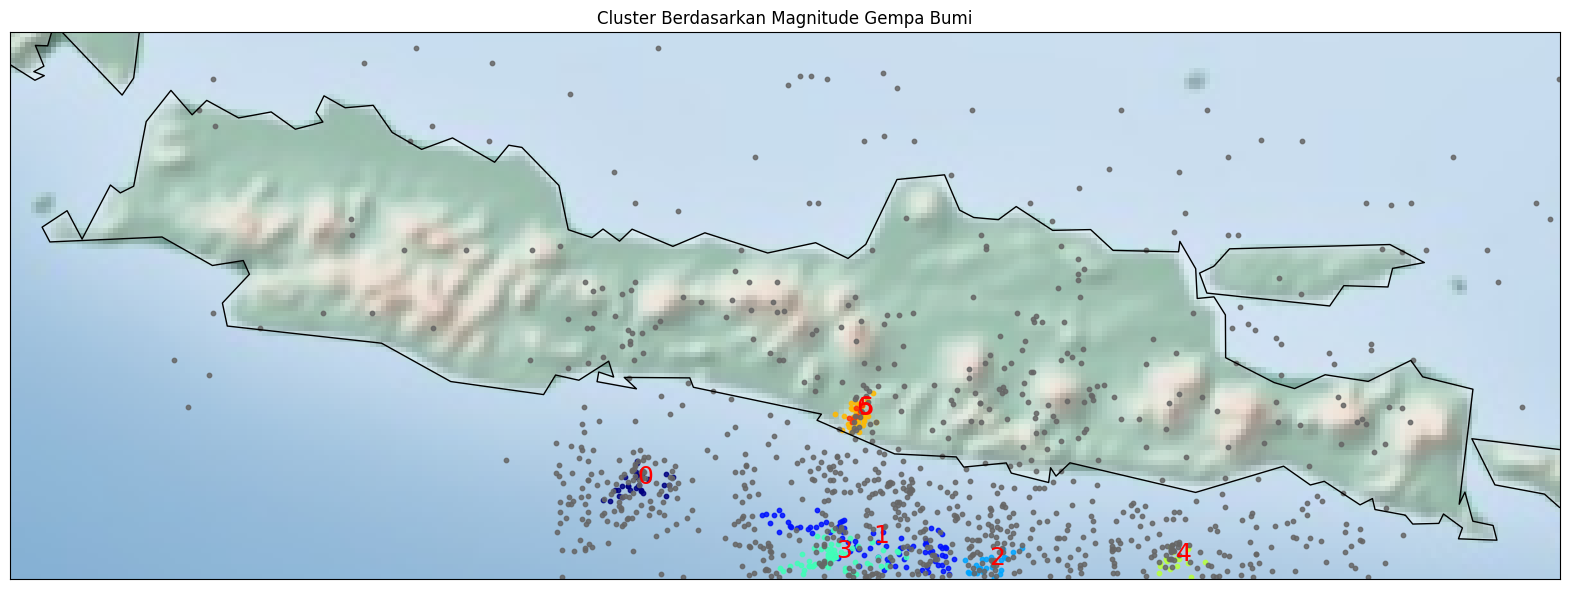

In [209]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))
plt.title('Cluster Berdasarkan Magnitude Gempa Bumi')

Magnitude Tahun 2017

In [210]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [211]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf_2017[['Latitude', 'Longitude', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [212]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_2017["Clus_Db"]=labels

In [213]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

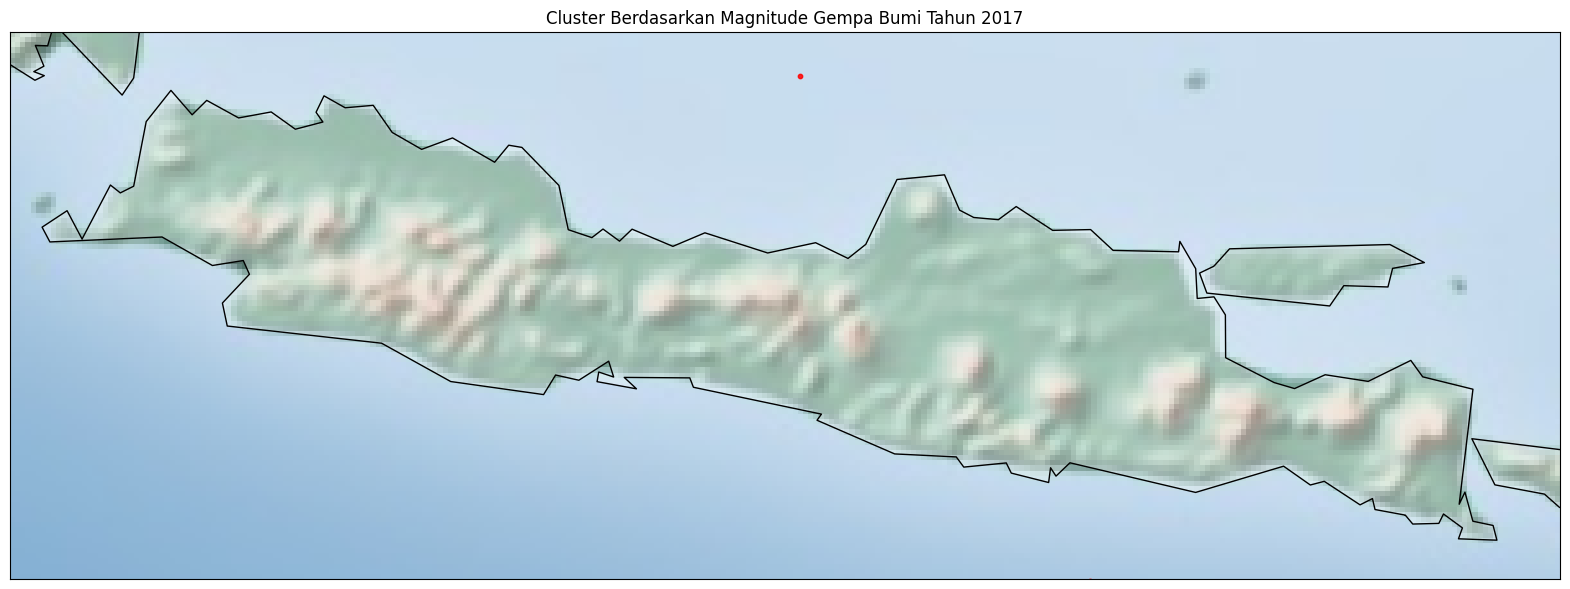

In [214]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf_2017[(pdf_2017.Clus_Db == clust_number) & (pdf_2017.Magnitude >= 5)]                    
    if len(clust_set) > 0:
        xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
        my_map.scatter(xm, ym, color='red', marker='o', s=10, alpha=0.85)
        if clust_number != -1:
            cenx=np.mean(xm) 
            ceny=np.mean(ym) 
            plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
            print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

plt.title('Cluster Berdasarkan Magnitude Gempa Bumi Tahun 2017')
plt.show()

Magnitude Tahun 2018

In [215]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [216]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf_2018[['Latitude', 'Longitude', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [217]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_2018["Clus_Db"]=labels

In [218]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

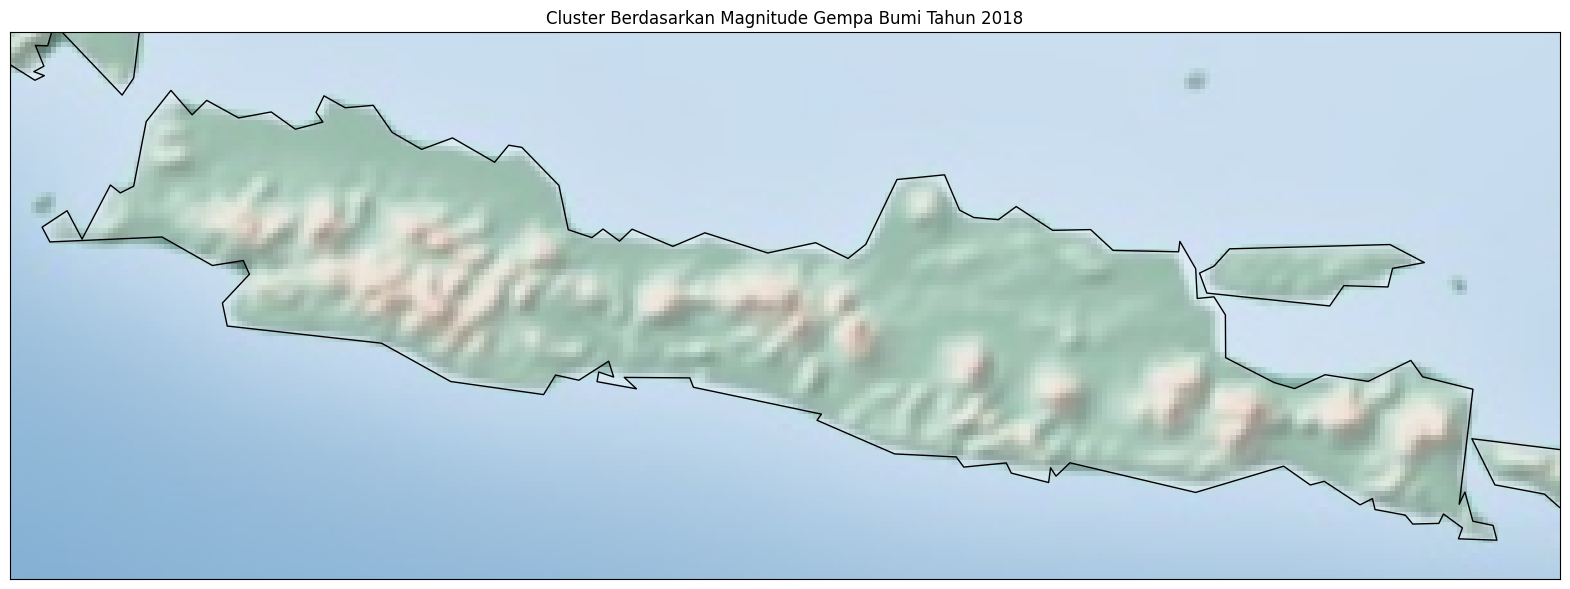

In [219]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf_2018[(pdf_2018.Clus_Db == clust_number) & (pdf_2018.Magnitude >= 5)]                    
    if len(clust_set) > 0:
        xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
        my_map.scatter(xm, ym, color='red', marker='o', s=10, alpha=0.85)
        if clust_number != -1:
            cenx=np.mean(xm) 
            ceny=np.mean(ym) 
            plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
            print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

plt.title('Cluster Berdasarkan Magnitude Gempa Bumi Tahun 2018')
plt.show()

Magnitude Tahun 2019

In [220]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [221]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf_2019[['Latitude', 'Longitude', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [222]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_2019["Clus_Db"]=labels

In [223]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

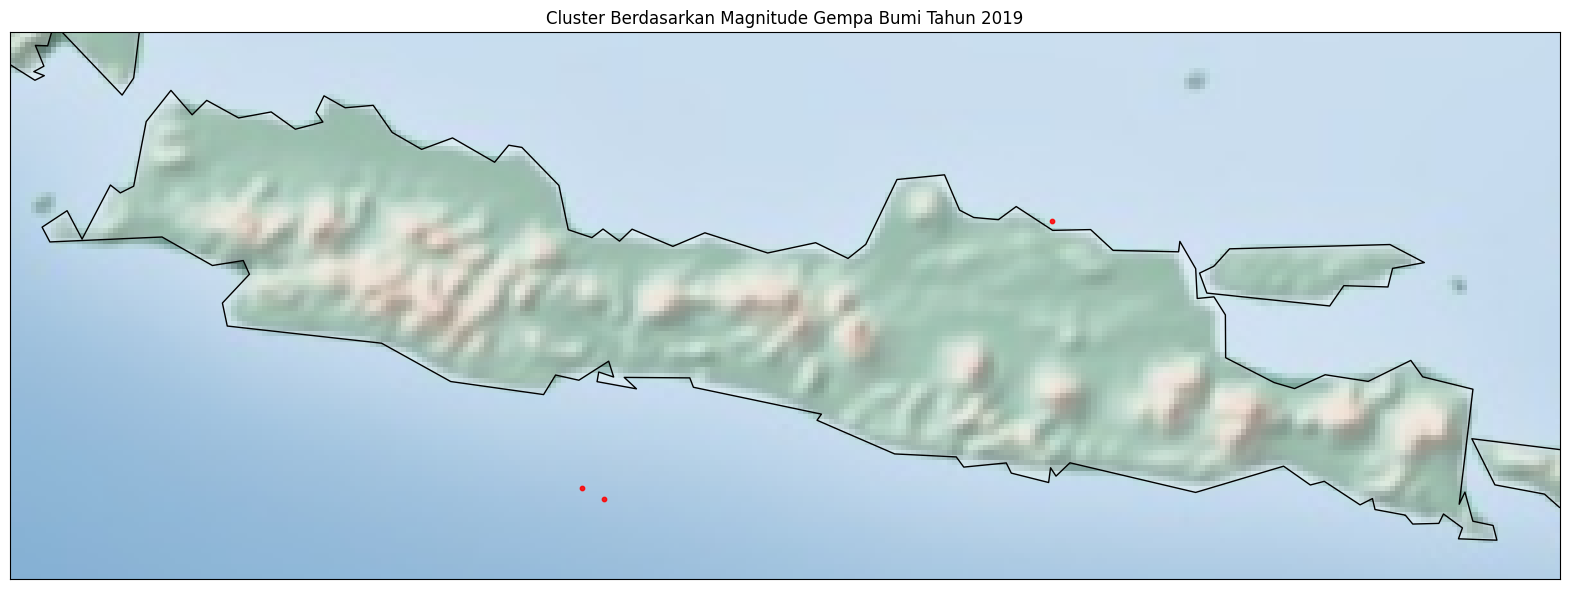

In [224]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf_2019[(pdf_2019.Clus_Db == clust_number) & (pdf_2019.Magnitude >= 5)]                    
    if len(clust_set) > 0:
        xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
        my_map.scatter(xm, ym, color='red', marker='o', s=10, alpha=0.85)
        if clust_number != -1:
            cenx=np.mean(xm) 
            ceny=np.mean(ym) 
            plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
            print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

plt.title('Cluster Berdasarkan Magnitude Gempa Bumi Tahun 2019')
plt.show()

Magnitude Tahun 2020

In [225]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [226]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf_2020[['Latitude', 'Longitude', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [227]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_2020["Clus_Db"]=labels

In [228]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

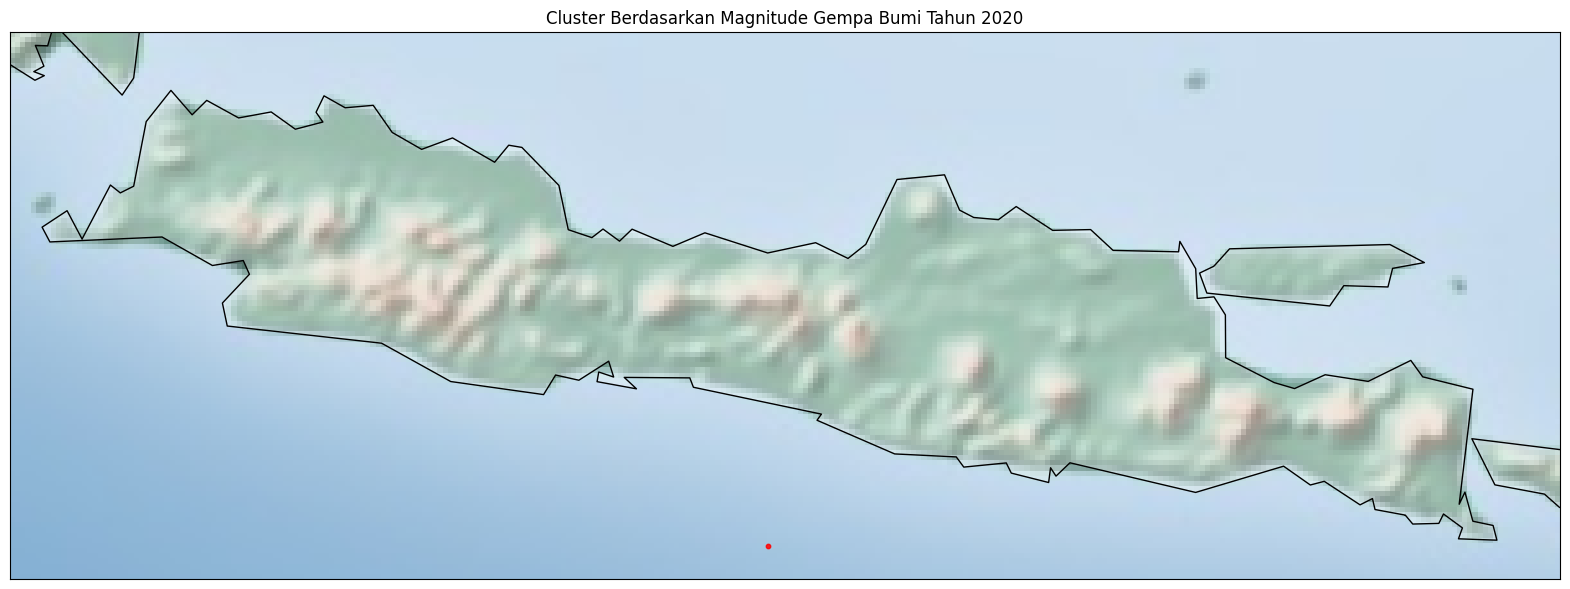

In [229]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf_2020[(pdf_2020.Clus_Db == clust_number) & (pdf_2020.Magnitude >= 5)]                    
    if len(clust_set) > 0:
        xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
        my_map.scatter(xm, ym, color='red', marker='o', s=10, alpha=0.85)
        if clust_number != -1:
            cenx=np.mean(xm) 
            ceny=np.mean(ym) 
            plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
            print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

plt.title('Cluster Berdasarkan Magnitude Gempa Bumi Tahun 2020')
plt.show()

Magnitude Tahun 2021

In [230]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [231]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf_2021[['Latitude', 'Longitude', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [232]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_2021["Clus_Db"]=labels

In [233]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

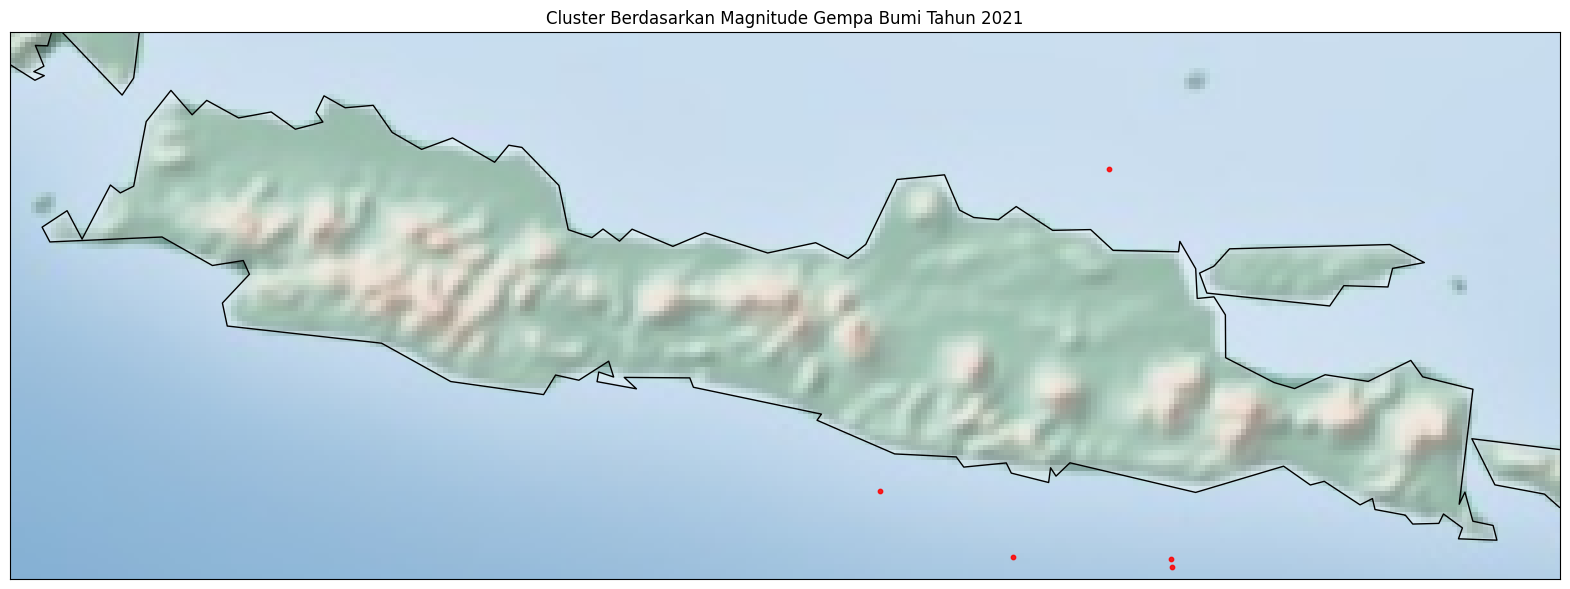

In [234]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf_2021[(pdf_2021.Clus_Db == clust_number) & (pdf_2021.Magnitude >= 5)]                    
    if len(clust_set) > 0:
        xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
        my_map.scatter(xm, ym, color='red', marker='o', s=10, alpha=0.85)
        if clust_number != -1:
            cenx=np.mean(xm) 
            ceny=np.mean(ym) 
            plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
            print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

plt.title('Cluster Berdasarkan Magnitude Gempa Bumi Tahun 2021')
plt.show()

Magnitude Tahun 2022

In [235]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
# %matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [236]:
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf_2022[['Latitude', 'Longitude', 'Magnitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [237]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf_2022["Clus_Db"]=labels

In [238]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

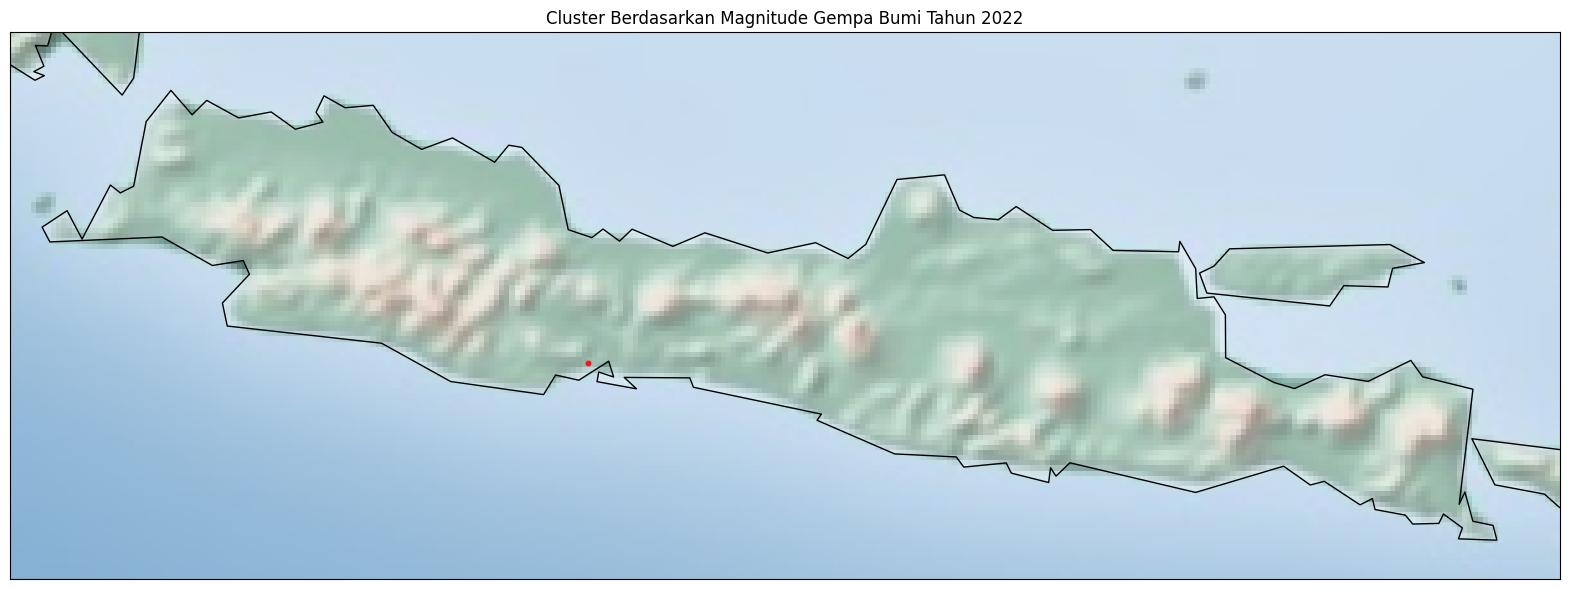

In [239]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf_2022[(pdf_2022.Clus_Db == clust_number) & (pdf_2022.Magnitude >= 5)]                    
    if len(clust_set) > 0:
        xm, ym = my_map(np.asarray(clust_set.Longitude), np.asarray(clust_set.Latitude))
        my_map.scatter(xm, ym, color='red', marker='o', s=10, alpha=0.85)
        if clust_number != -1:
            cenx=np.mean(xm) 
            ceny=np.mean(ym) 
            plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
            print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.Magnitude)))

plt.title('Cluster Berdasarkan Magnitude Gempa Bumi Tahun 2022')
plt.show()

In [240]:
# Filter data berdasarkan wilayah tertentu
filtered_data = pdf_2022[(pdf_2022['Longitude'] > llon) & (pdf_2022['Longitude'] < ulon) & (pdf_2022['Latitude'] > llat) & (pdf_2022['Latitude'] < ulat)]

# Pilih kolom yang ingin diekspor
export_data = filtered_data[['Datetime', 'Longitude', 'Latitude', 'Kedalaman', 'Magnitude', 'Keterangan', 'Clus_Db']]

export_data.to_csv('filtered_data_pulau_jawa_2022.csv', index=False)

# Export data ke file Excel
#export_data.to_excel('filtered_data_pulau_jawa_2018.xlsx', index=False)


years = [2017, 2018, 2019, 2020, 2021, 2022]
dbi_results = [dbi_2017, dbi_2018, dbi_2019, dbi_2020, dbi_2021, dbi_2022]

bar_colors = [tuple(random.random() for _ in range(3)) for _ in range(len(years))]
plt.bar(years, dbi_results, color=bar_colors)

plt.xlabel('Year')
plt.ylabel('DBI Value')
plt.title('DBI Results from 2017 to 2022')

plt.show()



years = [2017, 2018, 2019, 2020, 2021, 2022]
si_results = [silhouette_avg_2017, silhouette_avg_2018, silhouette_avg_2019, silhouette_avg_2020, silhouette_avg_2021, silhouette_avg_2022]

bar_colors = [tuple(random.random() for _ in range(3)) for _ in range(len(years))]
plt.bar(years, si_results, color=bar_colors)

plt.xlabel('Year')
plt.ylabel('Silhoutte Score Value')
plt.title('Silhoutte Score Results from 2017 to 2022')

plt.show()


C:\Users\wajit\AppData\Local\Temp\ipykernel_25800\2177939912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_data_above_5Mg['Year'] = pd.to_datetime(earthquake_data_above_5Mg['Datetime']).dt.year


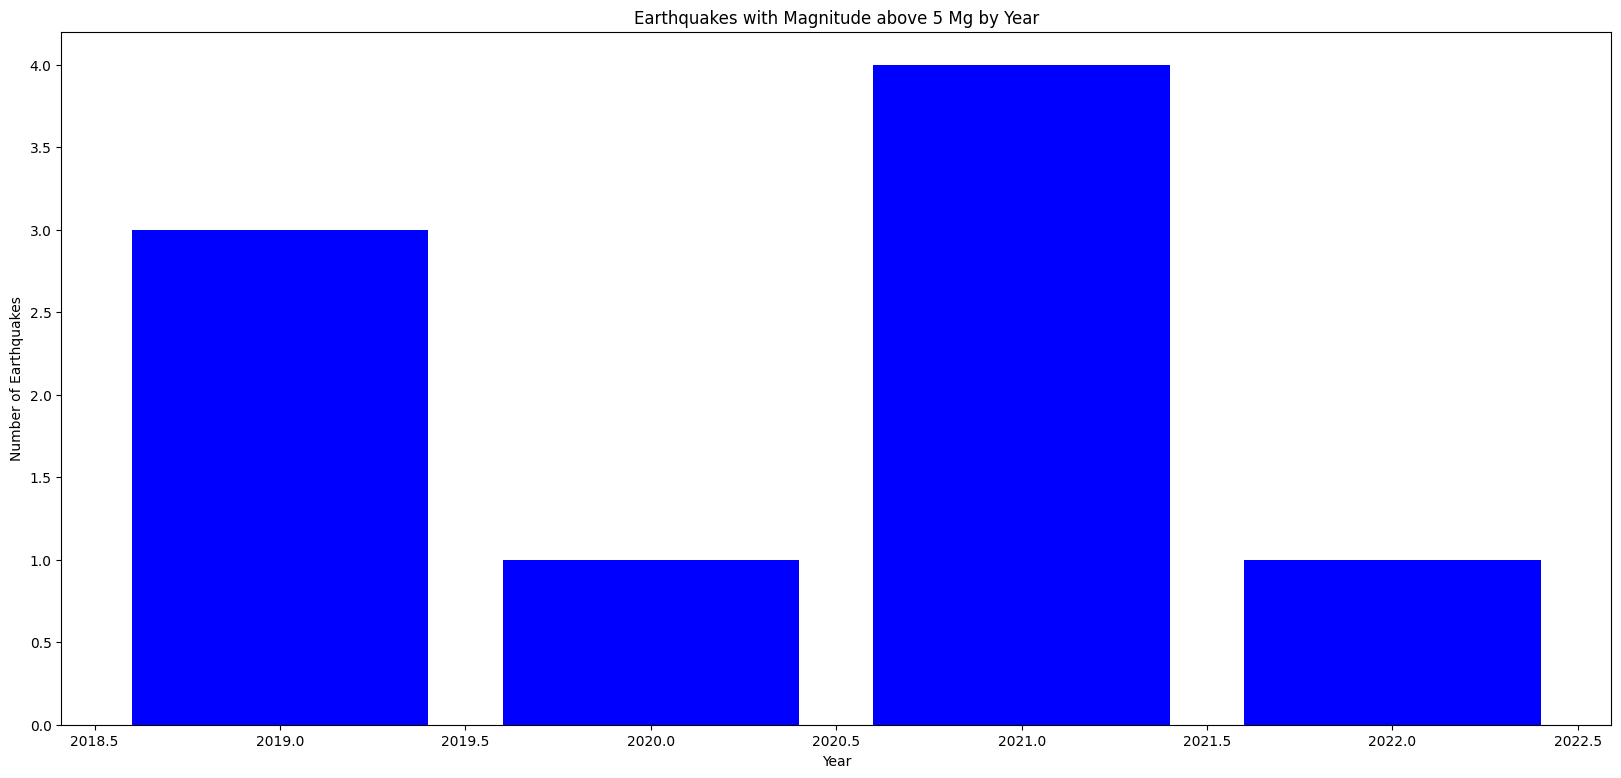

In [241]:
# Filter earthquakes with magnitude above 5
earthquake_data_above_5Mg = pdf[pdf['Magnitude'] > 5]

# Extract year from the 'Date' column and create a new column 'Year'
earthquake_data_above_5Mg['Year'] = pd.to_datetime(earthquake_data_above_5Mg['Datetime']).dt.year

# Group earthquakes by year and count the number of earthquakes in each year
earthquakes_count_by_year = earthquake_data_above_5Mg.groupby('Year')['Magnitude'].count()

# Create a bar chart for the earthquakes count by year

plt.figure(figsize=(20, 9))
plt.bar(earthquakes_count_by_year.index, earthquakes_count_by_year.values, color='blue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquakes with Magnitude above 5 Mg by Year')

# Show the plot
plt.show()

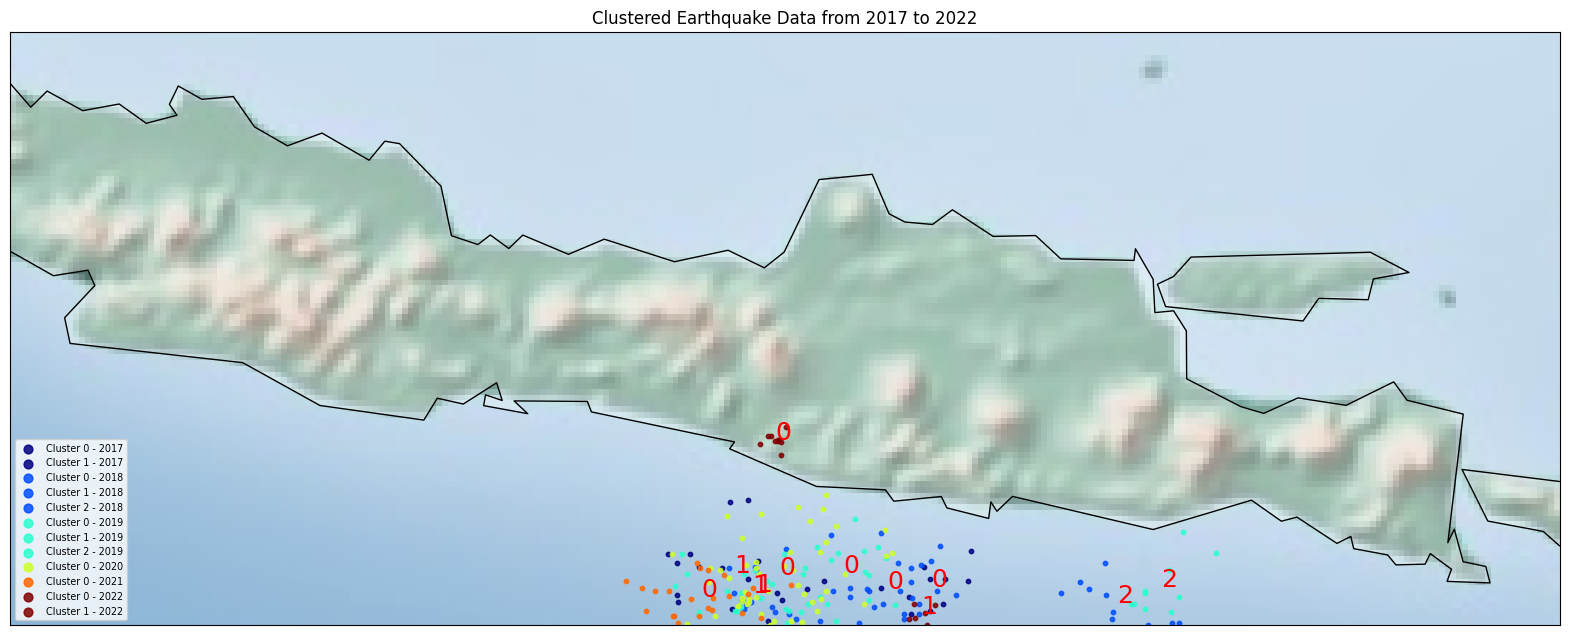

In [242]:
# Assuming you have the file names 'data_2017.csv', 'data_2018.csv', 'data_2019.csv', and 'data_2020.csv'
# Replace the file names with the actual file names or file paths of your data.
data_2017 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2017.csv')
data_2018 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2018.csv')
data_2019 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2019.csv')
data_2020 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2020.csv')
data_2021 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2021.csv')
data_2022 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2022.csv')


# Concatenate the data for all years
all_data = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021, data_2022], ignore_index=True)
all_data['Datetime'] = pd.to_datetime(all_data['Datetime'])
all_data['Year'] = all_data['Datetime'].dt.year

# Extract latitude, longitude, and cluster labels
latitudes = all_data['Latitude']
longitudes = all_data['Longitude']
labels = all_data['Clus_Db']
years = all_data['Year']

all_data = all_data[all_data['Clus_Db'] != -1]

# Create a Basemap object
my_map = Basemap(projection='merc', resolution='l', area_thresh=1000.0,
                 llcrnrlon=min(longitudes), llcrnrlat=min(latitudes),
                 urcrnrlon=max(longitudes), urcrnrlat=max(latitudes))

# Draw map elements
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

# Define colors for different clusters
unique_clusters = sorted(set(labels))
unique_years = sorted(set(years))
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(unique_years)))
year_color_map = {year: colors[i] for i, year in enumerate(unique_years)}

# Plot the data points with different colors based on their clusters and years
for year in set(years):
    year_data = all_data[all_data['Year'] == year]
    lat = np.asarray(year_data['Latitude'])
    lon = np.asarray(year_data['Longitude'])
    lab = np.asarray(year_data['Clus_Db'])
    xm, ym = my_map(lon, lat)
    for clust_number in unique_clusters:
        # Get the color from the colormap based on the cluster number
        if clust_number != -1:
            c = year_color_map[year]
            clust_set = year_data[year_data['Clus_Db'] == clust_number]
            if not clust_set.empty:
                xm, ym = my_map(np.asarray(clust_set['Longitude']), np.asarray(clust_set['Latitude']))
                my_map.scatter(xm, ym, color=c, marker='o', s=10, alpha=0.85, label=f'Cluster {clust_number} - {year}')
                cenx = np.mean(xm)
                ceny = np.mean(ym)
                plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')


# Show the map with the legend
plt.title('Clustered Earthquake Data from 2017 to 2022')
plt.legend(loc='lower left', fontsize='x-small', markerscale=2)
plt.show()

data_2017 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2017.csv')
data_2018 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2018.csv')
data_2019 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2019.csv')
data_2020 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2020.csv')
data_2021 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2021.csv')
data_2022 = pd.read_csv('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\filtered_data_pulau_jawa_2022.csv')

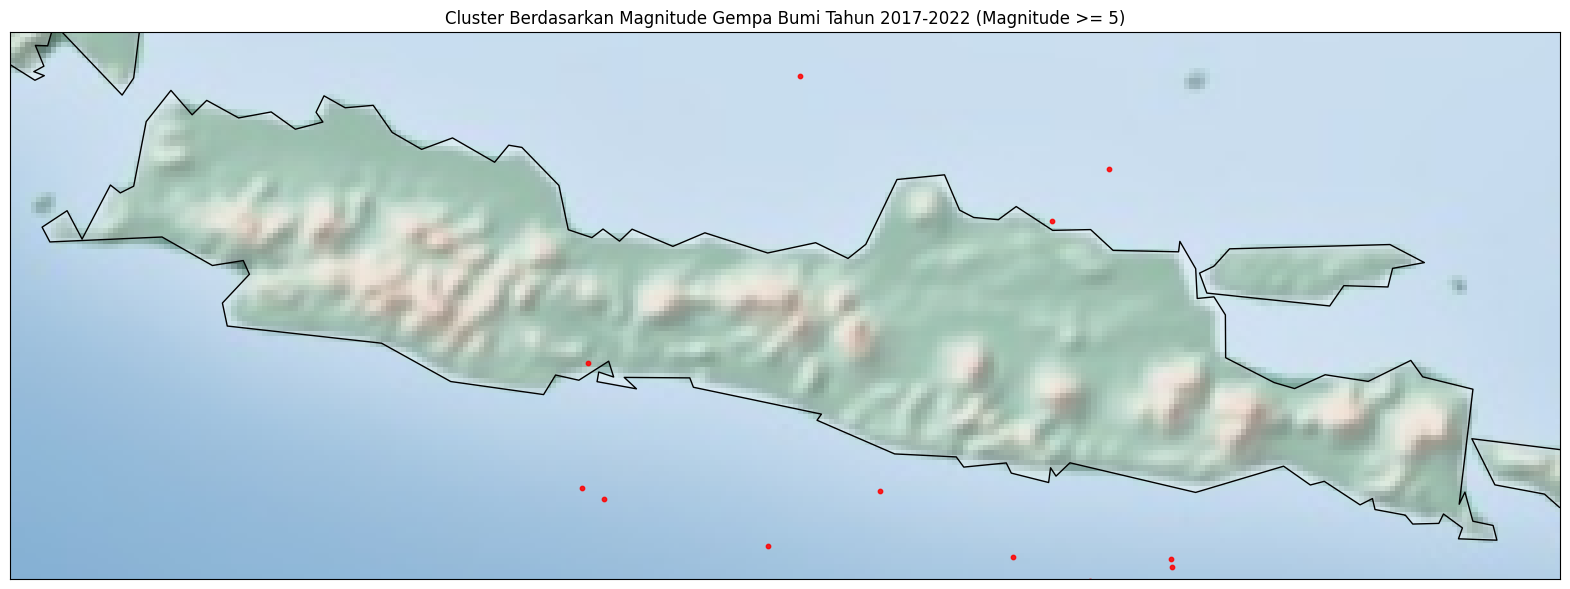

In [243]:
# Assuming you have the file names 'data_2017.csv', 'data_2018.csv', 'data_2019.csv', and 'data_2020.csv'
# Replace the file names with the actual file names or file paths of your data.
data_2017 = pdf_2017
data_2018 = pdf_2018
data_2019 = pdf_2019
data_2020 = pdf_2020
data_2021 = pdf_2021
data_2022 = pdf_2022

# Concatenate the data for all years
all_data = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021, data_2022], ignore_index=True)
all_data['Datetime'] = pd.to_datetime(all_data['Datetime'])
all_data['Year'] = all_data['Datetime'].dt.year


all_data = all_data[all_data['Magnitude'] >= 5]


# Extract latitude, longitude, and cluster labels
latitudes = all_data['Latitude']
longitudes = all_data['Longitude']
labels = all_data['Clus_Db']

# Create a Basemap object
my_map = Basemap(projection='merc',
                 resolution='l', area_thresh=1000.0,
                 llcrnrlon=llon, llcrnrlat=llat,
                 urcrnrlon=ulon, urcrnrlat=ulat)

# Draw map elements
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, len(set(labels))))

for clust_number in set(labels):
    c = ([0.4, 0.4, 0.4]) if clust_number == -1 else colors[int(clust_number)]
    clust_set = all_data[(all_data['Clus_Db'] == clust_number) & (all_data['Magnitude'] >= 5)]
    if len(clust_set) > 0:
        xm, ym = my_map(np.asarray(clust_set['Longitude']), np.asarray(clust_set['Latitude']))
        my_map.scatter(xm, ym, color='red', marker='o', s=10, alpha=0.85)
        if clust_number != -1:
            cenx = np.mean(xm)
            ceny = np.mean(ym)
            plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
            print("Cluster " + str(clust_number) + ', Avg Magnitude: ' + str(np.mean(clust_set['Magnitude'])))

plt.title('Cluster Berdasarkan Magnitude Gempa Bumi Tahun 2017-2022 (Magnitude >= 5)')
plt.show()